In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from matplotlib.mlab import PCA

%matplotlib notebook

In [4]:
df = pd.read_csv('load_voltage_profile_55.csv')
num_loads=len(df.columns)-1
print('Total Loads:',num_loads)

Total Loads: 55


In [5]:
df.head(5)

,timestamp,voltage_load1,voltage_load2,voltage_load3,voltage_load4,voltage_load5,voltage_load6,voltage_load7,voltage_load8,voltage_load9,...,votlage_load46,voltage_load47,voltage_load48,voltage_load49,voltage_load50,voltage_load51,voltage_load52,voltage_load53,voltage_load54,voltage_load55
0,2000-01-01 00:01:00 EST,252.113668,252.099954,252.112302,252.046500,252.046500,252.098588,252.044152,252.067000,252.022045,...,251.928325,252.023000,251.928825,251.928325,251.946871,251.925959,251.916129,251.946371,251.924592,251.915263
1,2000-01-01 00:02:00 EST,252.114034,252.094490,252.113534,252.048097,252.048097,252.094490,252.035090,252.073001,252.024509,...,251.931155,252.031000,251.932521,251.931155,251.934711,251.929655,251.918959,251.933845,251.928289,251.918959
2,2000-01-01 00:03:00 EST,252.108473,252.098954,252.107107,252.035608,252.035608,252.098954,252.044018,252.054000,252.008921,...,251.892978,252.014000,251.897076,251.895710,251.945471,251.896942,251.887112,251.945471,251.895576,251.887112
3,2000-01-01 00:04:00 EST,252.089422,252.107615,252.088922,251.985174,251.989272,252.106749,252.060242,252.025000,251.968684,...,251.841713,251.976001,251.847177,251.845811,251.966658,251.851641,251.841311,251.966658,251.850275,251.840445
4,2000-01-01 00:05:00 EST,252.086362,252.111480,252.085496,251.980919,251.984151,252.110614,252.069106,251.961000,251.963832,...,251.824005,251.876001,251.833067,251.831701,251.968994,251.843362,251.833030,251.968128,251.841995,251.833030


In [6]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,timestamp,voltage_load1,voltage_load2,voltage_load3,voltage_load4,voltage_load5,voltage_load6,voltage_load7,voltage_load8,voltage_load9,...,votlage_load46,voltage_load47,voltage_load48,voltage_load49,voltage_load50,voltage_load51,voltage_load52,voltage_load53,voltage_load54,voltage_load55
0,2000-01-01 00:01:00,252.113668,252.099954,252.112302,252.046500,252.046500,252.098588,252.044152,252.067000,252.022045,...,251.928325,252.023000,251.928825,251.928325,251.946871,251.925959,251.916129,251.946371,251.924592,251.915263
1,2000-01-01 00:02:00,252.114034,252.094490,252.113534,252.048097,252.048097,252.094490,252.035090,252.073001,252.024509,...,251.931155,252.031000,251.932521,251.931155,251.934711,251.929655,251.918959,251.933845,251.928289,251.918959
2,2000-01-01 00:03:00,252.108473,252.098954,252.107107,252.035608,252.035608,252.098954,252.044018,252.054000,252.008921,...,251.892978,252.014000,251.897076,251.895710,251.945471,251.896942,251.887112,251.945471,251.895576,251.887112
3,2000-01-01 00:04:00,252.089422,252.107615,252.088922,251.985174,251.989272,252.106749,252.060242,252.025000,251.968684,...,251.841713,251.976001,251.847177,251.845811,251.966658,251.851641,251.841311,251.966658,251.850275,251.840445
4,2000-01-01 00:05:00,252.086362,252.111480,252.085496,251.980919,251.984151,252.110614,252.069106,251.961000,251.963832,...,251.824005,251.876001,251.833067,251.831701,251.968994,251.843362,251.833030,251.968128,251.841995,251.833030


In [7]:
df=df.set_index('timestamp').sort_index().interpolate().ffill().bfill()
df.head()

,voltage_load1,voltage_load2,voltage_load3,voltage_load4,voltage_load5,voltage_load6,voltage_load7,voltage_load8,voltage_load9,voltage_load10,...,votlage_load46,voltage_load47,voltage_load48,voltage_load49,voltage_load50,voltage_load51,voltage_load52,voltage_load53,voltage_load54,voltage_load55
timestamp,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:01:00,252.113668,252.099954,252.112302,252.046500,252.046500,252.098588,252.044152,252.067000,252.022045,252.038322,...,251.928325,252.023000,251.928825,251.928325,251.946871,251.925959,251.916129,251.946371,251.924592,251.915263
2000-01-01 00:02:00,252.114034,252.094490,252.113534,252.048097,252.048097,252.094490,252.035090,252.073001,252.024509,252.029760,...,251.931155,252.031000,251.932521,251.931155,251.934711,251.929655,251.918959,251.933845,251.928289,251.918959
2000-01-01 00:03:00,252.108473,252.098954,252.107107,252.035608,252.035608,252.098954,252.044018,252.054000,252.008921,252.038688,...,251.892978,252.014000,251.897076,251.895710,251.945471,251.896942,251.887112,251.945471,251.895576,251.887112
2000-01-01 00:04:00,252.089422,252.107615,252.088922,251.985174,251.989272,252.106749,252.060242,252.025000,251.968684,252.054911,...,251.841713,251.976001,251.847177,251.845811,251.966658,251.851641,251.841311,251.966658,251.850275,251.840445
2000-01-01 00:05:00,252.086362,252.111480,252.085496,251.980919,251.984151,252.110614,252.069106,251.961000,251.963832,252.063276,...,251.824005,251.876001,251.833067,251.831701,251.968994,251.843362,251.833030,251.968128,251.841995,251.833030


In [8]:
df_diff=df.diff().interpolate().ffill().bfill()
df_diff.head()

,voltage_load1,voltage_load2,voltage_load3,voltage_load4,voltage_load5,voltage_load6,voltage_load7,voltage_load8,voltage_load9,voltage_load10,...,votlage_load46,voltage_load47,voltage_load48,voltage_load49,voltage_load50,voltage_load51,voltage_load52,voltage_load53,voltage_load54,voltage_load55
timestamp,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:01:00,0.000366,-0.005464,0.001232,0.001598,0.001598,-0.004098,-0.009062,0.006,0.002464,-0.008562,...,0.002830,0.008000,0.003696,0.002830,-0.012160,0.003696,0.002830,-0.012526,0.003696,0.003696
2000-01-01 00:02:00,0.000366,-0.005464,0.001232,0.001598,0.001598,-0.004098,-0.009062,0.006,0.002464,-0.008562,...,0.002830,0.008000,0.003696,0.002830,-0.012160,0.003696,0.002830,-0.012526,0.003696,0.003696
2000-01-01 00:03:00,-0.005562,0.004464,-0.006428,-0.012490,-0.012490,0.004464,0.008928,-0.019,-0.015588,0.008928,...,-0.038177,-0.017000,-0.035445,-0.035445,0.010760,-0.032713,-0.031847,0.011626,-0.032713,-0.031847
2000-01-01 00:04:00,-0.019051,0.008661,-0.018185,-0.050434,-0.046336,0.007795,0.016223,-0.029,-0.040237,0.016223,...,-0.051265,-0.037999,-0.049898,-0.049899,0.021188,-0.045300,-0.045801,0.021188,-0.045300,-0.046667
2000-01-01 00:05:00,-0.003060,0.003865,-0.003426,-0.004255,-0.005121,0.003865,0.008864,-0.064,-0.004852,0.008364,...,-0.017708,-0.100000,-0.014110,-0.014110,0.002335,-0.008280,-0.008281,0.001469,-0.008280,-0.007415


In [10]:
data=np.array(df_diff)
#data=np.array(df)


In [61]:
d=len(df.columns)
pca=PCA(data.T[:,-d:])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: The PCA class was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  


In [38]:
np.shape(data.T)

(55, 1440)

In [39]:
np.shape(pca.Y)

(55, 55)

<IPython.core.display.Javascript object>


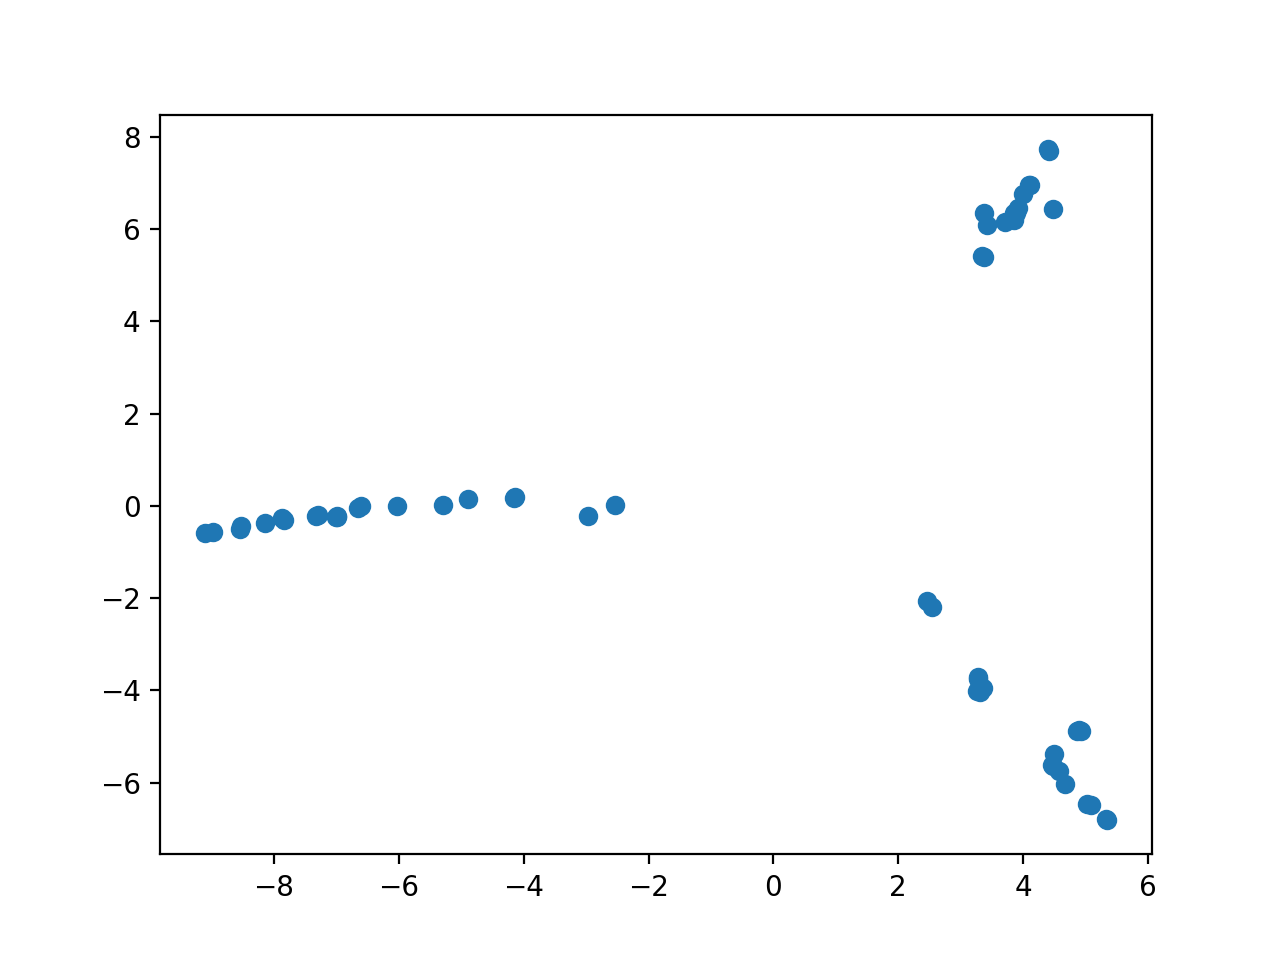

In [40]:
%matplotlib notebook
plt.figure()
plt.scatter(pca.Y[:,0],pca.Y[:,1])

## DBSCAN clustering

<IPython.core.display.Javascript object>


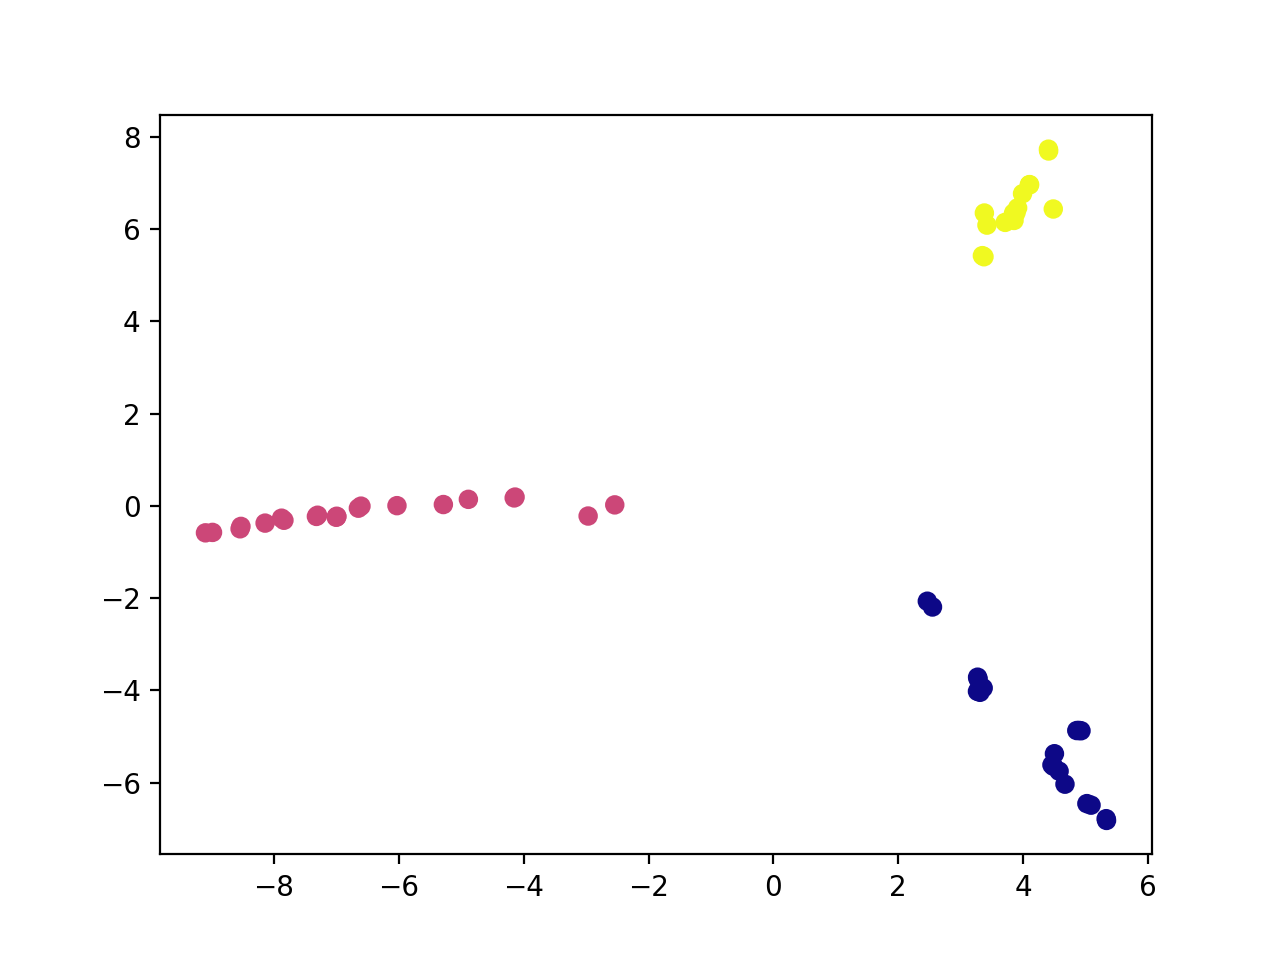

In [45]:
from sklearn.cluster import DBSCAN

X=pca.Y

clusters_dbscan = DBSCAN(eps=4, min_samples=5).fit(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=clusters_dbscan.labels_, cmap="plasma")

In [69]:
n_clusters_dbscan = len(set(clusters_dbscan.labels_))

phase_0_dbscan = [vol_l for i, vol_l in enumerate(df.columns) if clusters_dbscan.labels_[i]==0]
phase_1_dbscan = [vol_l for i, vol_l in enumerate(df.columns) if clusters_dbscan.labels_[i]==1]
phase_2_dbscan = [vol_l for i, vol_l in enumerate(df.columns) if clusters_dbscan.labels_[i]==2]

print('Number of clusters with dbscan: ', n_clusters_dbscan)
print('Number of loads on phase_0 with dbscan: ', len(phase_0_dbscan))
print('Number of loads on phase_1 with dbscan: ', len(phase_1_dbscan))
print('Number of loads on phase_2 with dbscan: ', len(phase_2_dbscan))

Number of clusters with dbscan:  3
Number of loads on phase_0 with dbscan:  19
Number of loads on phase_1 with dbscan:  21
Number of loads on phase_2 with dbscan:  15


## kmean clustering

<IPython.core.display.Javascript object>


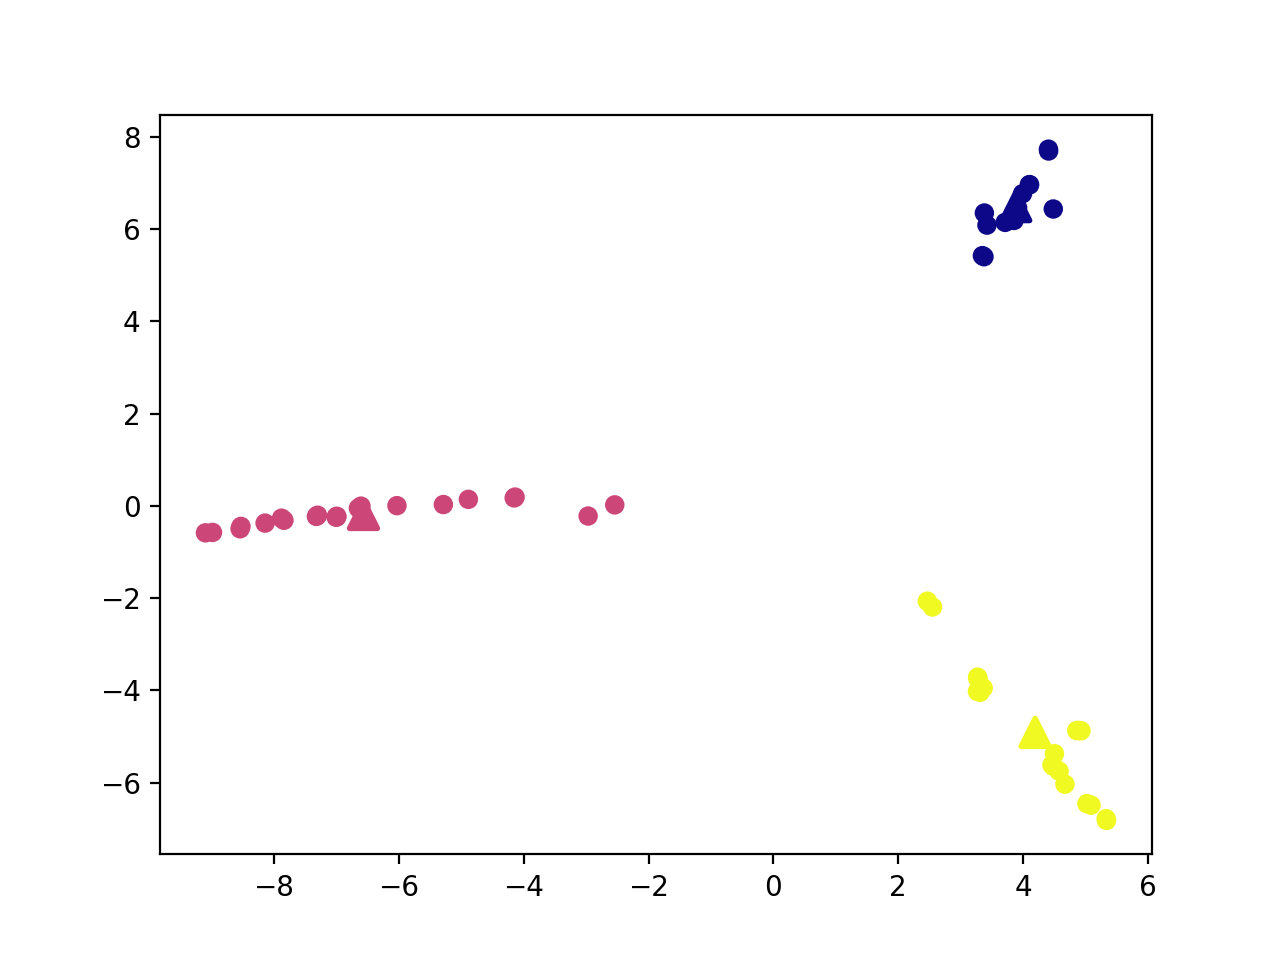

In [54]:
from sklearn.cluster import KMeans
X=pca.Y
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters_kmean = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=clusters_kmean, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2], 
            s=100, 
            linewidth=2,
            cmap="plasma")

In [68]:
n_clusters_kmean = len(set(clusters_kmean))

phase_0_kmean = [vol_l for i, vol_l in enumerate(df.columns) if clusters_kmean[i]==0]
phase_1_kmean = [vol_l for i, vol_l in enumerate(df.columns) if clusters_kmean[i]==1]
phase_2_kmean = [vol_l for i, vol_l in enumerate(df.columns) if clusters_kmean[i]==2]

print('Number of clusters with kmean: ', n_clusters_kmean)
print('Number of loads on phase_0 with kmean: ', len(phase_0_kmean))
print('Number of loads on phase_1 with kmean: ', len(phase_1_kmean))
print('Number of loads on phase_2 with kmean: ', len(phase_2_kmean))

Number of clusters with kmean:  3
Number of loads on phase_0 with kmean:  15
Number of loads on phase_1 with kmean:  21
Number of loads on phase_2 with kmean:  19


## kmean clustering with Mahalanobis distance
#### Not complete, sometime not converging

In [63]:
import random
from scipy.spatial.distance import mahalanobis
meters_v=df.columns

def cluster_points(X, mu):
    clusters = {}
    clusters_m = {}
    VI = np.linalg.inv(np.cov(X.T))
    for x, met in zip(X, meters_v):
        mu_best_id = np.argmin([mahalanobis(x, mm, VI) for mm in mu])
        try:
            clusters[mu_best_id].append(x)
            clusters_m[mu_best_id].append(met)
        except: 
            clusters[mu_best_id] = [x]
            clusters_m[mu_best_id] = [met]
    return clusters, clusters_m

def reevaluate_centers(clusters):
    new_mu = []
    keys = sorted(clusters.keys())
    for k in keys:
        new_mu.append(np.mean(clusters[k], axis=0))
    return new_mu
            
def has_converged(mu, old_mu):
    return (set([tuple(a) for a in mu])==set([tuple(b) for b in old_mu]))

def md_cluster(X,k):
    old_mu=random.sample(X.tolist(),k)
    mu=random.sample(X.tolist(),k)
    
    i=0
    while not has_converged(mu, old_mu):
        print (i,mu[0][0],mu[1][0],mu[2][0])
        old_mu=mu
        i+=1
        clusters, clusters_m=cluster_points(X, mu)
        mu=reevaluate_centers(clusters)
        if i>2000:
            #old_mu=random.sample(X.tolist(),k)
            #mu=random.sample(X.tolist(),k)
            #i=0
            break
            
    #print (i,mu[0][0],mu[1][0],mu[2][0])  
    return mu,clusters_m
    
X=pca.Y
k=3
mu1,clusters_mahal=md_cluster(X, k)

colors=[]
dd={0:'r',1:'b',2:'y'}
keys=sorted(clusters_meters.keys())
for met in df.columns:
    for k in keys:
        if met in clusters_mahal[k]:
            colors.append(dd[k])
            
print('DONE!!!')            
    

0 -8.982049162382971 5.334793369237082 -5.285065417235859
1 0.8449727279142756 -1.2168900320855454 0.21042644373159788
2 -0.4729450645506076 -0.1900328243540817 0.6131941978993628
3 0.0825152887855778 -0.9061077841939126 1.482514503810309
4 0.6634621044439588 -1.4076412527725999 0.8677869646365944
5 0.4107195995376539 -1.1321279511697964 1.3568086112870672
6 0.5379998734328144 -1.2627258059603714 1.1220471960745355
7 -0.2211063765065857 -0.5362668325975409 1.05185233961763
8 -0.41570056904132324 -1.2524371786360906 2.2241836635698857
9 0.0007129287885213979 -1.4820646686216374 1.563688665867652
10 -0.420473860418778 -0.5629879940207727 1.5777065238175831
11 0.29752437313011487 -1.5600835909740411 1.5595717595182919
12 1.4916431612457428 -1.824734044929102 0.3155597845421302
13 1.4198046292262865 -3.2257960025601013 1.2489116974597616
14 0.10611105442256707 -1.9458891560132354 1.3331972077740062
15 0.4544866086876631 -1.2819042888134884 0.6924803865665111
16 1.4646987318902491 -1.335785

148 0.3313285719465457 -0.2730798352960148 -0.04307763468964046
149 -1.360645839590845 -0.37284927271848217 1.0578116412702516
150 -2.173874722566597 -0.3482009277661314 1.5147359119981916
151 -1.348065691006979 -0.587940833914349 1.3467871477713589
152 -1.078558164684704 -0.7803155242621096 1.1694556490674641
153 -0.4736572848795844 -0.5360731487941142 1.1285222494000167
154 -0.8708676731242333 -0.23318893762533482 0.9501075660184002
155 -1.0505269346394512 0.09126164240879203 0.9907001097423285
156 -0.9572070406249058 0.4698643005916598 0.5607085113469076
157 -1.3043917569080132 0.4294529469591877 0.9354057860828076
158 0.07438688584357067 0.013893168980712751 -0.1239927910660396
159 0.5898832556454725 -0.44743024949307497 0.12483029621423716
160 0.6520177365229692 -0.7211449772886503 0.3195826891754593
161 0.7194495424319494 -0.3912950104404377 -0.17074720289538536
162 0.5740908062863554 0.19346194818913173 -0.6269897521090866
163 0.878257402911922 -0.7720310103821412 0.107862979840

284 -0.15168666756212823 0.5065226139899766 -0.28108626167434275
285 -0.6566935135000117 0.3388784296090668 0.25319889982685045
286 -0.6520392390192786 -0.1782765512403698 0.6119695088815799
287 -0.8679332459346003 -0.023135147267222277 0.7552439410683188
288 -1.9029774645957453 -0.7625781647646479 1.7055518334901305
289 -1.367686091588321 -0.37415394922500533 1.2681278222255528
290 -1.85275217570671 0.2624601196686645 0.6304613141416887
291 -1.1733877556590178 -0.41258797170294803 0.9133260220943429
292 -0.8344731492316219 -0.47436392535655597 0.863524587903724
293 -0.21277612570729101 -0.8347138170718506 1.4515483434583618
294 0.4442057045205798 -0.034146635262255684 -0.22213612405042882
295 -0.06649592555644072 0.2890158374714561 -0.33234855167628663
296 1.0125524736328477 -0.9246344329730543 0.26207942307871385
297 0.0702927222049579 -1.2013046251923172 0.9688696899829924
298 1.1828576814661338 -1.8611006701181843 1.0087741210931758
299 1.7335686751576533 -1.2837284034487697 0.2852

416 0.7714414492413371 -0.013647708442304647 -0.5939484137542973
417 0.9764247700708543 -1.3545992383242549 0.12469739607220243
418 1.2609784719775603 -1.727936990640681 -0.11447150212796106
419 0.2600095551204405 -0.4732286237115918 0.28024500206579755
420 0.6944276155866809 -1.3662206156354548 0.641958534859586
421 0.15595106514594104 -1.1956478724456183 1.0561127088939872
422 0.03573048234832227 -1.3456593291648449 1.3136899502216097
423 0.03455843640091724 -1.2364351142214605 1.4928025870491222
424 0.20996863162413007 -0.03277050428742703 -0.13492102111325277
425 -1.0810893855325903 0.5787289012937602 0.19357249747367447
426 -0.9909450209319536 0.30040894330955303 0.6958136182696533
427 0.5896231478991931 -0.5311815016264874 -0.0032018850618949083
428 0.4660874055471592 -0.6795972104203982 0.25126520545215053
429 0.4360165933418731 -0.6809558652477363 0.1586621023541147
430 0.4714885425344736 -0.678333567271571 0.04582894435492211
431 -0.17159731903648895 -0.6918880776676929 0.7485

552 -1.0993449390319983 -0.16557556799955025 0.8799447005436865
553 0.8189857635127967 -2.41953251026687 0.9603280480524441
554 0.19450610045786196 -1.250462091020061 0.5349246417260236
555 0.6536648469030547 -1.790105179852029 0.5042878386226292
556 0.2034707274104688 -0.04391583446595182 -0.0644072362026071
557 -0.24047726298056246 -0.2666906008373259 0.22915892777055458
558 -0.8987593573697717 0.12624896020532778 0.3246344046352603
559 -0.12443517880952053 0.6375840639646396 -0.5407292362519626
560 0.7725649299836496 0.39931619164310805 -1.0347271998819259
561 -0.4037516142644404 0.32662625631905556 0.10764250963518629
562 -0.011467945625335632 -0.9363285601630537 1.153958194887068
563 -0.045367899852039116 -0.48602529561065816 0.7715703495272739
564 0.45532686010053497 0.24847469089751661 -0.8512940099912807
565 1.3556917722345605 -0.5910593348931386 -0.6189881635621031
566 1.4139411654410359 -0.4830871932791387 -0.5650710954726162
567 0.5819264576441192 0.6696644993927858 -0.81014

693 0.5484788562644749 -0.5145624662155643 0.2382558325961303
694 -0.8420442857483159 0.646486035395853 -0.04976539247832453
695 -0.47173308089966004 0.2191070933332697 0.24472262685746363
696 -0.9251623186206102 -0.017507370580648215 1.2434956677743527
697 -0.958679151817324 0.28619594164741446 0.7791141051285748
698 -1.4685287755926653 0.42980607071004207 0.6133906931591417
699 -1.6464068277163466 -0.29252125498074666 1.6231078300179413
700 -1.0957634768283768 -0.03592928870702939 1.467865444512319
701 -0.943724785696782 -0.09514036798751113 1.5515019899559033
702 -0.6163697828453075 0.5855446973243816 0.0880622495188452
703 -0.931919218625037 0.3074665353121808 0.5263559234575895
704 -0.43680353403852396 0.23572320698144408 0.22327198667477574
705 0.8326729022447865 -0.307067877119022 -0.8103409574828621
706 0.33916103497418915 0.3677670990593832 -1.4138562680671443
707 0.266702785917126 -0.25545671665572633 -0.2598373669650041
708 -0.029873191081074033 0.6369010644815369 -0.8931157

826 -0.028782030175079482 -0.8985685396848148 0.7257577756713518
827 1.3047398799786887 -1.1361888388185484 -0.08645894304519137
828 0.11829853848439005 -0.75521285939326 0.7235762116590023
829 -0.28280730475576804 -0.8622782958316781 0.9246631766992109
830 -0.14349960175075133 -0.8465772289077766 0.7498862845587174
831 0.9797867579735788 -0.8931930567776064 -0.07009966287292971
832 -0.09245920226329424 -0.2953409874894343 0.2962368865966123
833 0.805753395744159 -0.8191841436774862 0.37736285081153154
834 0.9543607481423476 -0.9018258729053394 0.25590126055710327
835 0.9319722776448106 -0.34028534667401905 -0.16785521791176441
836 -0.21911310781218846 0.3782184573873522 -0.3632165178280954
837 -0.6115955505740752 0.7589831750341948 -0.927492152937903
838 -0.05478784785915076 0.4099896046960993 -0.6217179812456007
839 0.5771839425977805 0.27145140963517383 -0.7448200010605608
840 -1.0446843686559844 0.12414072038927185 0.39820146393872025
841 -0.36152135343480635 0.2656388127515817 -0.

962 1.3950705041421034 0.11941034248667337 -1.1019302125104793
963 1.5617451517462893 -0.12845050678483438 -1.0020274197464043
964 2.1418914010118346 0.1253734827955608 -2.0418026310693063
965 0.8709191449284056 0.9055668277954315 -1.334726821556538
966 0.8960156552939265 0.09916241787469308 -0.6576519970990728
967 0.7389752970685846 0.5001764850009457 -1.2271395625583088
968 0.7341907303321735 0.12611371569302146 -0.8184397891718864
969 0.24809421984952498 1.3471294407917058 -2.375114475258308
970 -0.8442325578146206 1.7444585555329268 -1.890618960517088
971 -0.5096560452049247 1.03970236674721 -0.8460339661313743
972 -0.5747319520129169 0.5554852991022423 -0.3883527251889473
973 0.10357387991785862 0.8780416313823837 -1.3248843218839548
974 0.43560847499235256 0.986741789513718 -1.7851581331031505
975 -0.31398875490769773 0.9132123030990243 -0.9987539307971489
976 1.164800124326633 -0.38787375260432605 -0.24571744365346115
977 1.8610366373063467 -1.6087034694512694 0.3430385946624152

1104 -0.5101851033583745 -1.007102808047484 2.374554671549601
1105 -0.3033956139661065 -0.8722115818583971 1.6604802544688495
1106 -1.2180004595072877 -0.2913207322699464 1.752608978050004
1107 -0.7381240210458924 -0.1433460711915531 0.9813576202496468
1108 -0.834315223485369 -1.4128710945267473 2.220264280912749
1109 -1.6886004027472026 -0.6543673682002369 1.920817670260639
1110 -0.26720257066739733 -1.1563138568101514 1.3122602205035618
1111 0.0032833808960826385 -1.3049846156213274 1.171695280297525
1112 -1.9652188402458792 0.19688153106912606 0.8446125248522826
1113 -1.8950206604596562 0.1589157301581579 1.2814662251164646
1114 -0.30017500117013735 -0.028930187884283 0.5842345199399722
1115 -1.2577128106698396 0.2863408943790712 1.0326834018735433
1116 -1.313684396653132 -0.5941722721815208 2.613769233961411
1117 -0.33010963952347094 -0.8471251307792002 2.130754608927942
1118 -0.18688257429777505 -0.7070624343839246 1.4840788494155264
1119 0.2922256976565566 -0.6934729834573158 0.6

1244 -0.5774947049412829 0.1765544104218811 0.32369773995982914
1245 0.7077783454963076 -1.4481006926502515 0.44696985185207433
1246 1.370604071591493 -1.8067253659661922 -0.5547578390941054
1247 0.11436378790153294 -1.4605184157581301 0.9810250239170649
1248 0.6979104819917586 -1.0890421264835672 0.19748034665012232
1249 0.18826413463018862 -1.0150323287426886 0.9700207220942074
1250 0.2597797545345092 -0.8684139831765765 1.173262840653656
1251 -0.48519403216603246 -0.19281200627230027 0.898814619390288
1252 0.0003405205488327123 -1.0803638002509197 1.5526824423118648
1253 -0.2663656445235485 -1.211462840852263 1.4000480387770853
1254 -1.0536502356933337 -0.3788596273780578 1.9549991913162073
1255 0.6934330275393497 -0.8387512858996936 0.43279999112727485
1256 0.4807090469472975 -1.3753984279282394 1.280451650567323
1257 0.7448762559342359 -2.3652529596451024 1.6510893069154586
1258 -0.565679874154588 -0.9821688675350119 1.5321444384502145
1259 0.5689376034812264 -1.1877886480340425 0

1385 0.5022155345388788 0.22121231967044888 -0.6557734182121595
1386 -0.0123749291789417 1.1779449341353487 -1.1668726290805054
1387 0.0061269184777157926 0.7264036222861051 -0.5657678306594196
1388 -0.2975089794662778 0.8077887132238862 -0.5183500409171268
1389 -0.2114347903679267 0.27051526148584293 -0.0019270431093822453
1390 -0.2114347903679267 0.7409707477459704 -0.591834305304872
1391 0.01950583309253111 0.4867064418007193 -0.5382842714272682
1392 0.507471844109186 0.20848559611356599 -0.9192897315207942
1393 0.42483117808570087 0.07876748868107727 -0.5424888811273032
1394 0.022014740534624058 0.019193259837852018 -0.049781394095084475
1395 0.872572406816968 0.12569438515221187 -1.181646784959288
1396 -0.18962827770381546 0.8048642680962133 -1.220539589938877
1397 0.18142679619486615 -0.40866767783990765 0.18422323134610394
1398 0.5236416905186588 -0.2868017910023902 -0.455396000993723
1399 0.19392408937994 -0.28454411978485067 -0.024126021771612105
1400 0.03656282402174339 0.212

1523 -0.5847023539390481 -0.5966376054322906 1.1166514875111127
1524 0.7797316398370525 -1.3930241297260122 0.046398732945583436
1525 0.14028248842655308 -0.3914658988345982 0.2285615364251635
1526 -0.8152236610355617 -0.05851878933490151 1.2304028020735223
1527 0.30124465150101537 -0.6421360451232607 0.46547023006742133
1528 -0.09914104003368816 -0.8746501981654857 1.342818331848956
1529 0.29006321031714116 -0.8416648711800157 0.8468202988588397
1530 1.2878171210946818 -1.8330390595423367 0.8468202988588397
1531 0.8110076393751073 -1.7740703967259752 1.1580124486281593
1532 -0.2521183419616734 -1.1778080152413277 2.3098810385586943
1533 0.4894725456811609 -1.8766036284391867 1.5503229748472056
1534 1.1296011854384131 -1.600117523657407 1.007586267849903
1535 -0.8261225846430424 -0.10977273173129017 1.5275728891473979
1536 -0.09664615157916119 -1.3142523520309526 1.681482357510708
1537 1.2770618718917586 -2.658553215082873 1.0810061968636424
1538 0.2974056708580654 -3.0929069373315823 

1668 -0.04682911887299493 -1.1404563173026863 0.8569808580060574
1669 -0.48403075960692815 -1.2274650399110634 1.158282543999293
1670 0.22785284103718334 -1.2924090693228478 0.7414539609549531
1671 -0.696535986132035 -0.25171010045455916 0.9869425302605964
1672 -1.0334843739528679 -0.38686900839609273 0.9917860179484509
1673 0.2894824013943642 -0.42164328265531326 0.17471363569216647
1674 -0.9316810799045445 0.9756511191272659 -0.5672486387054444
1675 -0.14238458950627203 0.4933969771942597 -0.3548194567295291
1676 -1.5102947707376813 1.518222773849426 0.16928738149787972
1677 -1.2075027532743412 0.3395896496700357 1.0094224574257358
1678 -0.5287514632219168 0.17964190256201715 0.39018127367871186
1679 -1.0351105147702797 -0.2319761570387365 1.2353556606594165
1680 -1.0863387389344634 -0.5970781550191767 1.2736822291905778
1681 -0.9504061202482574 -1.075797092714229 1.4149844512985112
1682 -1.3160281237506715 -0.5477215872652302 1.0875175651501237
1683 -1.567462767627624 -0.82573168930

1813 0.5753173663094405 -0.8990299473913684 -0.018775017924307347
1814 0.8767181294322228 -0.7346127339998002 -0.81744062729111
1815 0.9121614758918917 -0.7812258721734444 -0.8401507655156268
1816 0.09968921622319846 0.9005805104173861 -0.8278321732764975
1817 0.29204458183635 0.13474978367297333 -0.5447329451775151
1818 1.1814694703804867 -0.8573037367972616 -0.975893833358366
1819 0.8952692144891065 -1.2201938952242526 0.06546084375324746
1820 1.0497341127361255 -0.8532510800335751 -0.6557417070246052
1821 0.2654991011258452 0.00606907894629734 -0.3340385568076349
1822 0.7229852541544206 -0.7868199149667882 -0.21684815274108474
1823 -0.003748468256894899 -0.0801222314398565 0.07983596108974783
1824 0.40638692202907006 0.26449761952249573 -0.556610276732846
1825 0.7917261897056674 0.22852688885844033 -1.055481753510295
1826 -0.06043373621806706 0.1525066233219442 -0.06597975359449955
1827 0.46492238584441886 -0.2814234564170239 -0.2131224511555024
1828 -0.5251666031052923 0.4547485825

1954 0.6629711379248469 -1.186889062809547 0.9452052599441865
1955 -0.3019919720522788 -1.2519960504803478 1.6235433586704238
1956 0.3876858421239291 -1.1508479222355905 1.1689944678713102
1957 -0.6219141607863704 -0.3067913991946311 0.9107358864260657
1958 -0.2724427245326813 -0.19027541262340977 0.4687241427513214
1959 -0.2685051579689456 -0.9966686709656397 1.236910128095749
1960 -0.6176472191756438 -1.2842242133432578 1.5713519689042355
1961 -0.8999895422198402 -0.48885494451079775 1.5038691795567087
1962 0.08481934535778123 -0.41069479472956405 0.5264141874467266
1963 1.4007994838894524 -1.5204628384847079 0.41970805613554546
1964 -0.01929171428950649 -1.0631619231072165 0.9259800973600958
1965 -0.31737038442699994 -0.4005121388415534 0.6932268780040853
1966 -1.161875126585063 0.11285947394197783 0.6583478286810703
1967 -0.10856310268029017 -0.5863046945571134 0.917129182758517
1968 -0.7297599342512182 -0.7105868588120686 1.1641690157713134
1969 -0.19207272443369983 0.039592606176

<IPython.core.display.Javascript object>


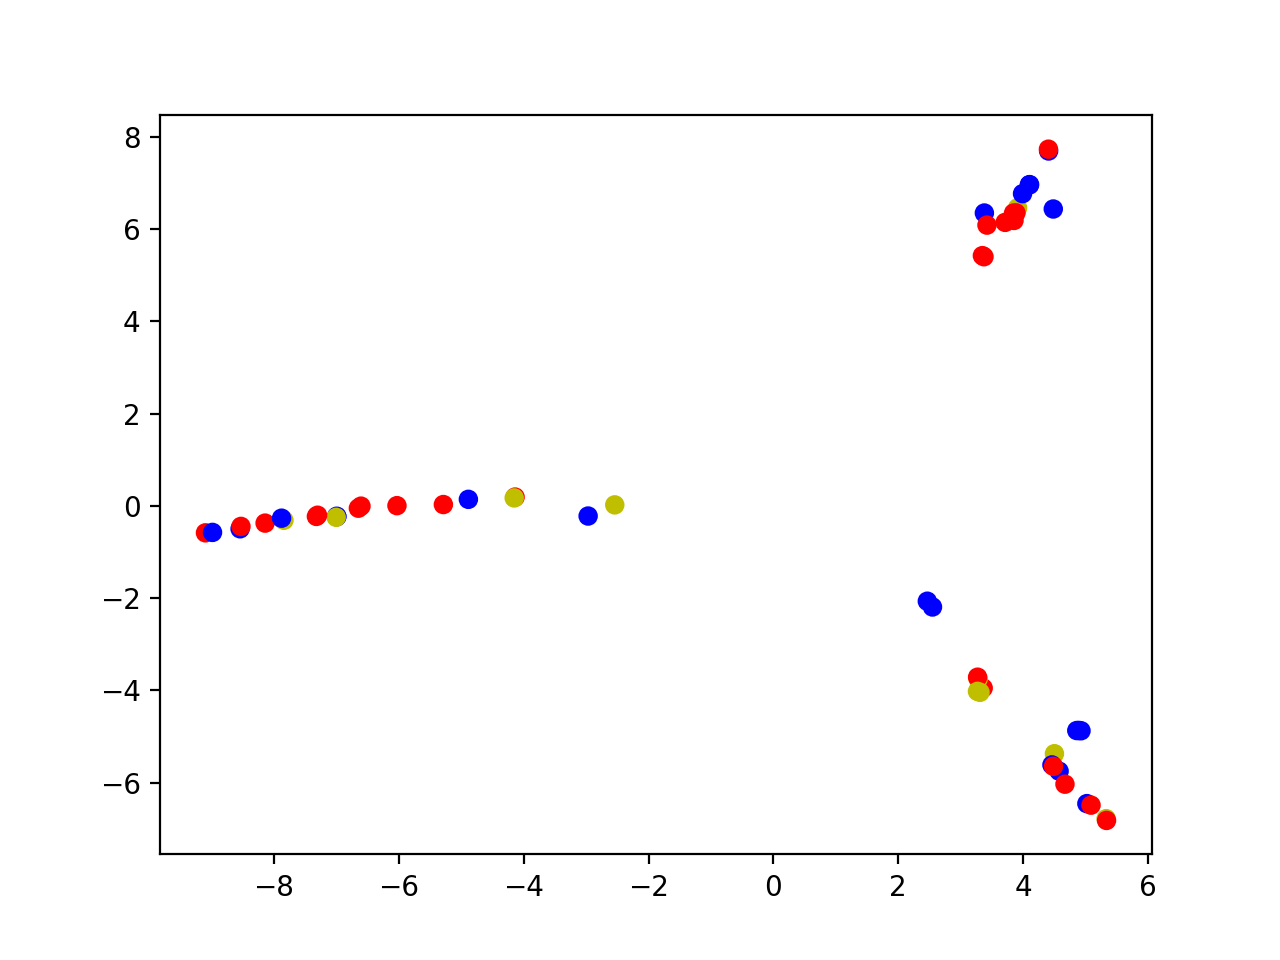

In [64]:
plt.figure()
plt.scatter(pca.Y[:,0],pca.Y[:,1],color=colors)

In [67]:
n_clusters_mahal = len(set(clusters_mahal))

phase_0_mahal = clusters_mahal[0]
phase_1_mahal = clusters_mahal[1]
phase_2_mahal = clusters_mahal[2]

print('Number of clusters with mahal: ', n_clusters_mahal)
print('Number of loads on phase_0 with mahal: ', len(phase_0_mahal))
print('Number of loads on phase_1 with mahal: ', len(phase_1_mahal))
print('Number of loads on phase_2 with mahal: ', len(phase_2_mahal))

Number of clusters with mahal:  3
Number of loads on phase_0 with mahal:  24
Number of loads on phase_1 with mahal:  21
Number of loads on phase_2 with mahal:  10
